In [1]:
import numpy as np 
import pandas as pd 

import sqlite3 as sql 

import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns 
import missingno as msno 

from utils import my_histogram

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
con = sql.connect("../data/database.sqlite")

In [5]:
df_match_ingame_shot = pd.read_csv("../data/df_match_ingame_shot.csv")

In [6]:
df_match_basic = pd.read_csv("../data/df_match_basic.csv")

- Let's analyze the goal and shot information from df_match_ingame_shot and df_match_basic table.

In [7]:
df_match_ingame_shot

,match_api_id,event_id,elapsed,team_api_id,category,type,subtype,player1_api_id,player2_api_id
0,489042,378998,22,10261.0,goal,n,header,37799.0,38807.0
1,489042,379019,24,10260.0,goal,n,shot,24148.0,24154.0
2,489043,375546,4,9825.0,goal,n,shot,26181.0,39297.0
3,489044,378041,83,8650.0,goal,n,distance,30853.0,30889.0
4,489045,376060,4,8654.0,goal,n,shot,23139.0,36394.0
...,...,...,...,...,...,...,...,...,...
229033,2030171,4940379,19,8370.0,shot,shotoff,NaN,36130.0,NaN
229034,2030171,4940624,44,8370.0,shot,shotoff,NaN,34104.0,NaN
229035,2030171,4940738,49,8558.0,shot,shotoff,NaN,107930.0,NaN
229036,2030171,4940963,71,8370.0,shot,shotoff,NaN,210065.0,NaN


In [8]:
df_match_basic

,match_api_id,country_id,league_id,season,stage,match_date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_result
0,492473,1,1,2008/2009,1,2008-08-17,9987,9993,1,1,draw
1,492474,1,1,2008/2009,1,2008-08-16,10000,9994,0,0,draw
2,492475,1,1,2008/2009,1,2008-08-16,9984,8635,0,3,away_win
3,492476,1,1,2008/2009,1,2008-08-17,9991,9998,5,0,home_win
4,492477,1,1,2008/2009,1,2008-08-16,7947,9985,1,3,away_win
...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,24558,24558,2015/2016,9,2015-09-22,10190,10191,1,0,home_win
25975,1992092,24558,24558,2015/2016,9,2015-09-23,9824,10199,1,2,away_win
25976,1992093,24558,24558,2015/2016,9,2015-09-23,9956,10179,2,0,home_win
25977,1992094,24558,24558,2015/2016,9,2015-09-22,7896,10243,0,0,draw


- Combine the home team id, away team id, match date, match result, and season information to the df_match_ingame_shot table.

In [9]:
home_info = df_match_basic[["match_api_id", "home_team_api_id", "match_date", "match_result", "season"]].rename(columns = {"home_team_api_id": "team_api_id"})

In [10]:
home_info["home_away"] = "home"

In [11]:
away_info = df_match_basic[["match_api_id", "away_team_api_id", "match_date", "match_result", "season"]].rename(columns = {"away_team_api_id": "team_api_id"})

In [12]:
away_info["home_away"] = "away"

In [13]:
home_away_info = pd.concat([home_info, away_info], axis = 0)

In [14]:
df_match_ingame_shot = df_match_ingame_shot.merge(home_away_info, how = "left", on = ["match_api_id", "team_api_id"])
df_match_ingame_shot

,match_api_id,event_id,elapsed,team_api_id,category,type,subtype,player1_api_id,player2_api_id,match_date,match_result,season,home_away
0,489042,378998,22,10261.0,goal,n,header,37799.0,38807.0,2008-08-17,draw,2008/2009,away
1,489042,379019,24,10260.0,goal,n,shot,24148.0,24154.0,2008-08-17,draw,2008/2009,home
2,489043,375546,4,9825.0,goal,n,shot,26181.0,39297.0,2008-08-16,home_win,2008/2009,home
3,489044,378041,83,8650.0,goal,n,distance,30853.0,30889.0,2008-08-16,away_win,2008/2009,away
4,489045,376060,4,8654.0,goal,n,shot,23139.0,36394.0,2008-08-16,home_win,2008/2009,home
...,...,...,...,...,...,...,...,...,...,...,...,...,...
229033,2030171,4940379,19,8370.0,shot,shotoff,NaN,36130.0,NaN,2015-10-23,home_win,2015/2016,home
229034,2030171,4940624,44,8370.0,shot,shotoff,NaN,34104.0,NaN,2015-10-23,home_win,2015/2016,home
229035,2030171,4940738,49,8558.0,shot,shotoff,NaN,107930.0,NaN,2015-10-23,home_win,2015/2016,away
229036,2030171,4940963,71,8370.0,shot,shotoff,NaN,210065.0,NaN,2015-10-23,home_win,2015/2016,home


- Combine the league name to the df_match_ingame_shot table.

In [15]:
org_league = pd.read_sql(
    "select * from League", con
    )

In [16]:
df_match_ingame_shot = df_match_ingame_shot.merge(df_match_basic[["match_api_id", "league_id"]], how = "left", on = "match_api_id")
df_match_ingame_shot = df_match_ingame_shot.merge(org_league.rename(columns = {"id" : "league_id", "name": "league_name"}), 
                                                            how = "left", on = "league_id")
df_match_ingame_shot.drop(["league_id", "country_id"], axis = 1, inplace = True)

In [17]:
df_match_ingame_shot

,match_api_id,event_id,elapsed,team_api_id,category,type,subtype,player1_api_id,player2_api_id,match_date,match_result,season,home_away,league_name
0,489042,378998,22,10261.0,goal,n,header,37799.0,38807.0,2008-08-17,draw,2008/2009,away,England Premier League
1,489042,379019,24,10260.0,goal,n,shot,24148.0,24154.0,2008-08-17,draw,2008/2009,home,England Premier League
2,489043,375546,4,9825.0,goal,n,shot,26181.0,39297.0,2008-08-16,home_win,2008/2009,home,England Premier League
3,489044,378041,83,8650.0,goal,n,distance,30853.0,30889.0,2008-08-16,away_win,2008/2009,away,England Premier League
4,489045,376060,4,8654.0,goal,n,shot,23139.0,36394.0,2008-08-16,home_win,2008/2009,home,England Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229033,2030171,4940379,19,8370.0,shot,shotoff,NaN,36130.0,NaN,2015-10-23,home_win,2015/2016,home,Spain LIGA BBVA
229034,2030171,4940624,44,8370.0,shot,shotoff,NaN,34104.0,NaN,2015-10-23,home_win,2015/2016,home,Spain LIGA BBVA
229035,2030171,4940738,49,8558.0,shot,shotoff,NaN,107930.0,NaN,2015-10-23,home_win,2015/2016,away,Spain LIGA BBVA
229036,2030171,4940963,71,8370.0,shot,shotoff,NaN,210065.0,NaN,2015-10-23,home_win,2015/2016,home,Spain LIGA BBVA


- Combine the league name to the df_match_basic table.

In [18]:
df_match_basic = df_match_basic.merge(org_league.drop("country_id", axis = 1).rename(columns = {"id" : "league_id", "name": "league_name"}), 
                                                      how = "left", on = "league_id")
df_match_basic.drop(["league_id", "country_id"], axis = 1, inplace = True)

In [19]:
df_match_basic

,match_api_id,season,stage,match_date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,match_result,league_name
0,492473,2008/2009,1,2008-08-17,9987,9993,1,1,draw,Belgium Jupiler League
1,492474,2008/2009,1,2008-08-16,10000,9994,0,0,draw,Belgium Jupiler League
2,492475,2008/2009,1,2008-08-16,9984,8635,0,3,away_win,Belgium Jupiler League
3,492476,2008/2009,1,2008-08-17,9991,9998,5,0,home_win,Belgium Jupiler League
4,492477,2008/2009,1,2008-08-16,7947,9985,1,3,away_win,Belgium Jupiler League
...,...,...,...,...,...,...,...,...,...,...
25974,1992091,2015/2016,9,2015-09-22,10190,10191,1,0,home_win,Switzerland Super League
25975,1992092,2015/2016,9,2015-09-23,9824,10199,1,2,away_win,Switzerland Super League
25976,1992093,2015/2016,9,2015-09-23,9956,10179,2,0,home_win,Switzerland Super League
25977,1992094,2015/2016,9,2015-09-22,7896,10243,0,0,draw,Switzerland Super League


# 1. Goal

In [450]:
df_match_ingame_shot_goal = df_match_ingame_shot[df_match_ingame_shot.category == "goal"]

## 1.1. Goal trend

### Q. Is there any goal trend change over the seasons?

In [451]:
goals_trend = df_match_basic.groupby(["league_name", "season"]).mean()[["home_team_goal", "away_team_goal"]].reset_index()

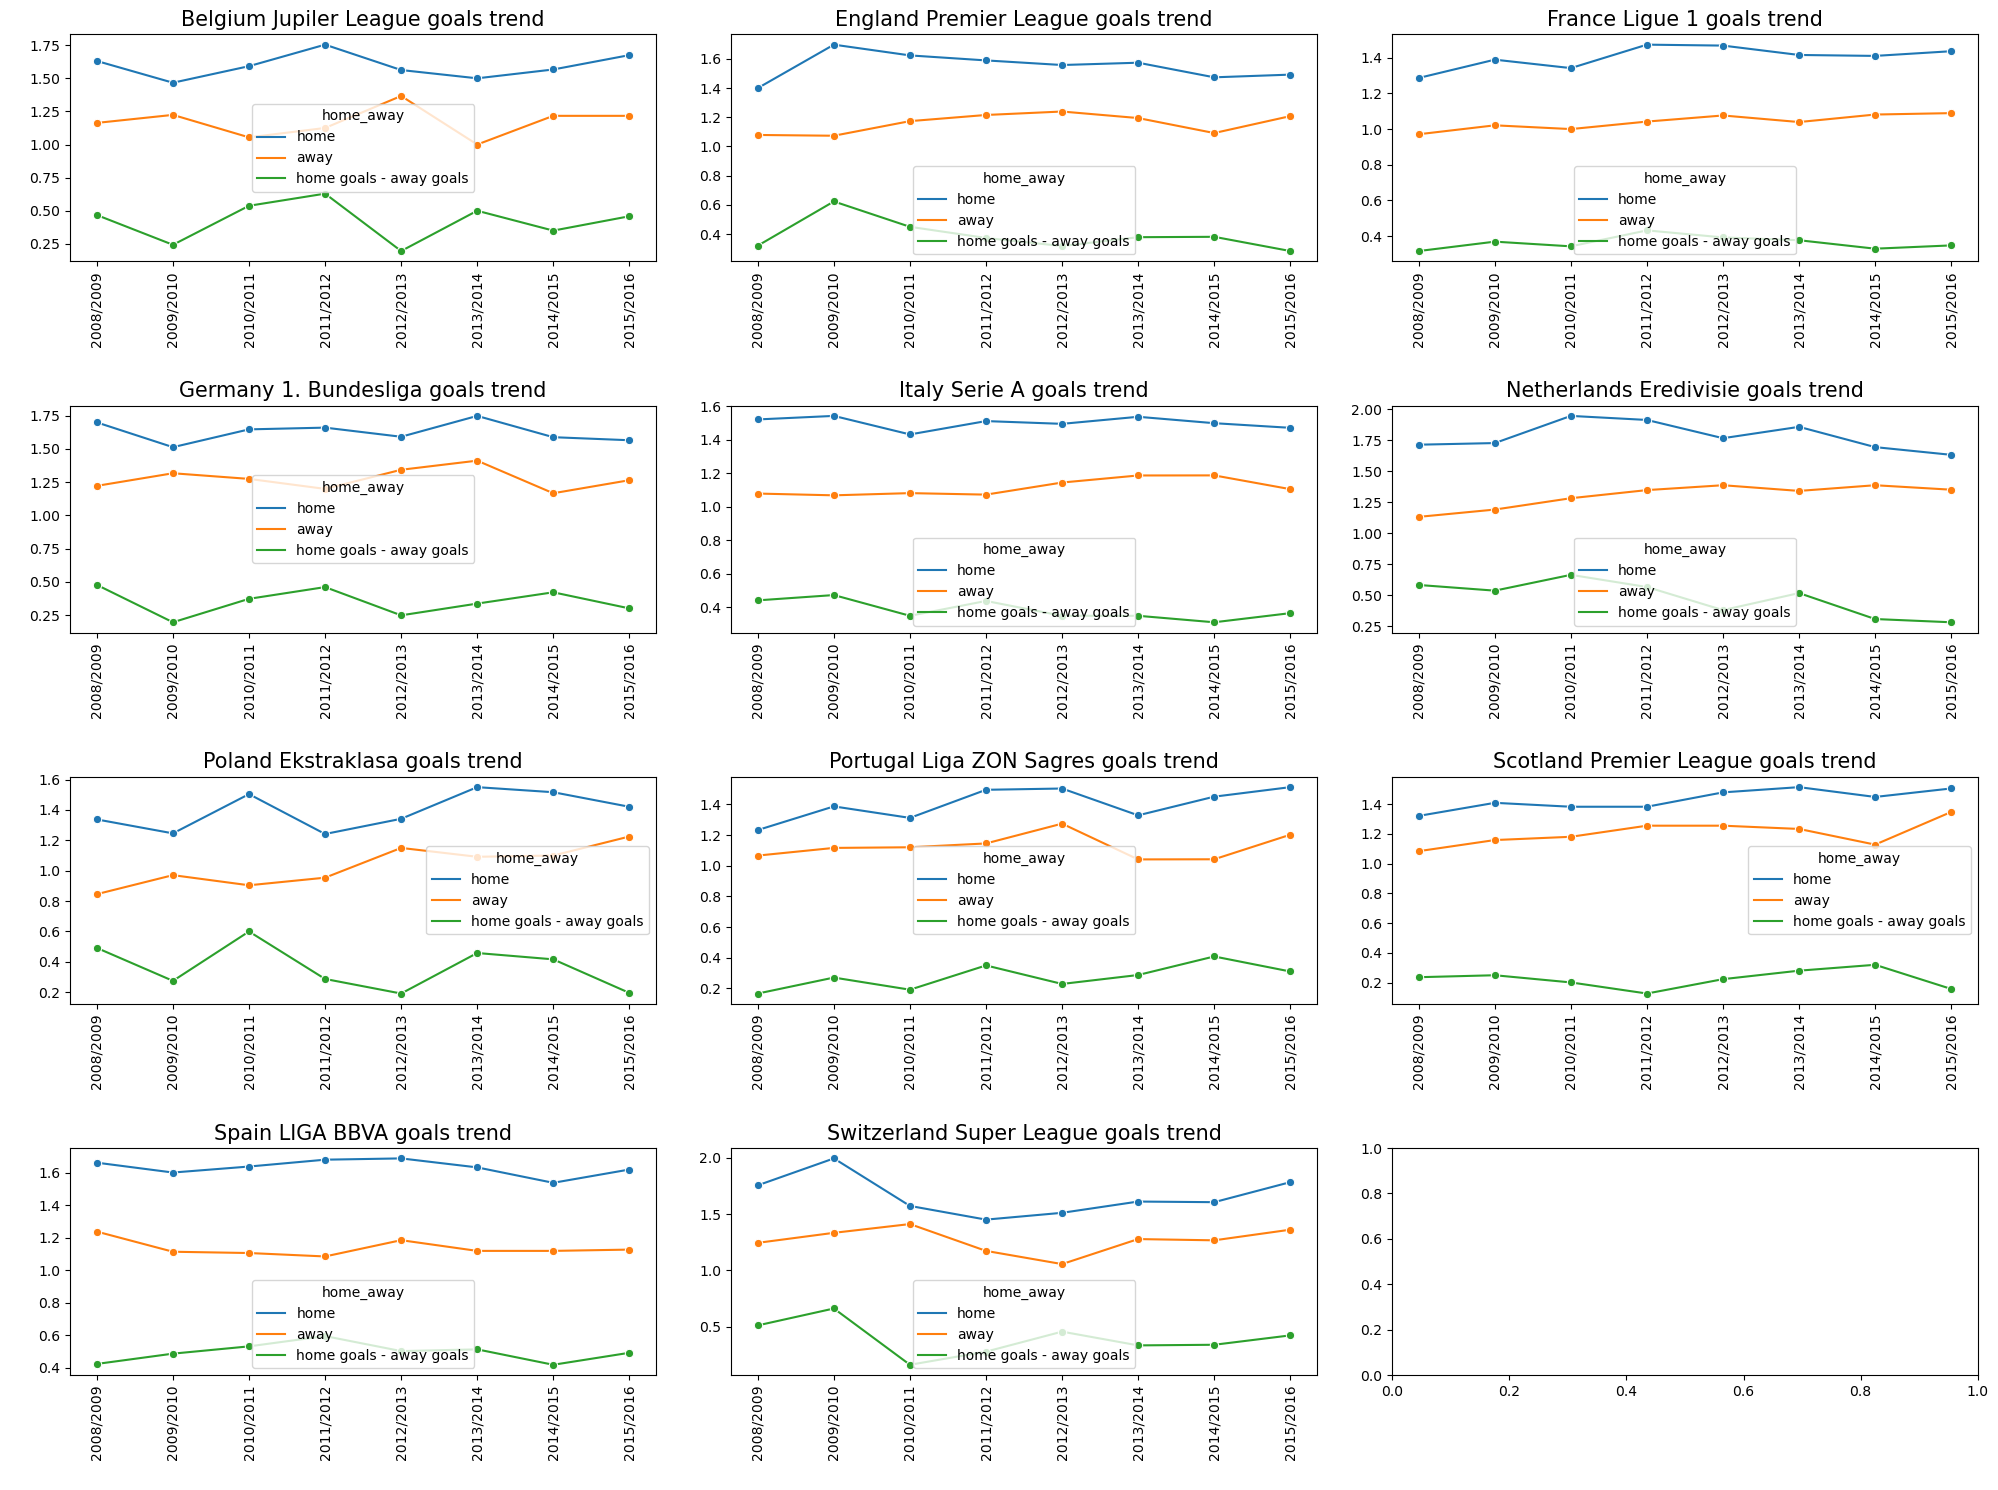

In [452]:
fig, axes = plt.subplots(4, 3, figsize = (20, 15))

for i, league in enumerate(goals_trend.league_name.unique()):
    home = goals_trend.loc[goals_trend.league_name == league, ["league_name", "season", "home_team_goal"]].rename(columns = {"home_team_goal" : "goals"})
    home["home_away"] = "home"

    away = goals_trend.loc[goals_trend.league_name == league, ["league_name", "season", "away_team_goal"]].rename(columns = {"away_team_goal" : "goals"})
    away["home_away"] = "away"
    
    home_m_away = home.copy()
    home_m_away["goals"] = home.goals - away.goals 
    home_m_away["home_away"] = "home goals - away goals"

    home_away = pd.concat([home, away, home_m_away], axis = 0)
    
    sns.lineplot(data = home_away, x = "season", y = "goals", hue = "home_away", marker = "o", ax = axes[i // 3, i % 3])

    axes[i // 3, i % 3].set_xlabel(" ", fontsize = 10)
    axes[i // 3, i % 3].set_ylabel(" ", fontsize = 10)
    axes[i // 3, i % 3].set_title(f"{league} goals trend", fontsize = 15)
    axes[i // 3, i % 3].tick_params(axis='x', labelrotation = 90)

plt.tight_layout()


- Home team scores more goals than away team in all leagues.
- The gap between the average number of home goals and the average number of away goals has remained similar across all seasons from the each league.
  
$\quad \rightarrow$ Since season has no effect in the goal trend, let's check the goal distribution without considering the season.


## 1.2. Goal distribution

- The number of goals has the most direct effect on winning or losing. If a team score more goals and get less, the team can win the game.
- If we can identify the characteristics of a team that scores a lot of goals and a team that scores few goals, we will have an advantage in predicting the match result.

### Q. How many more goals did the winning team score than the losing team?

Text(0, 0.5, 'Count')

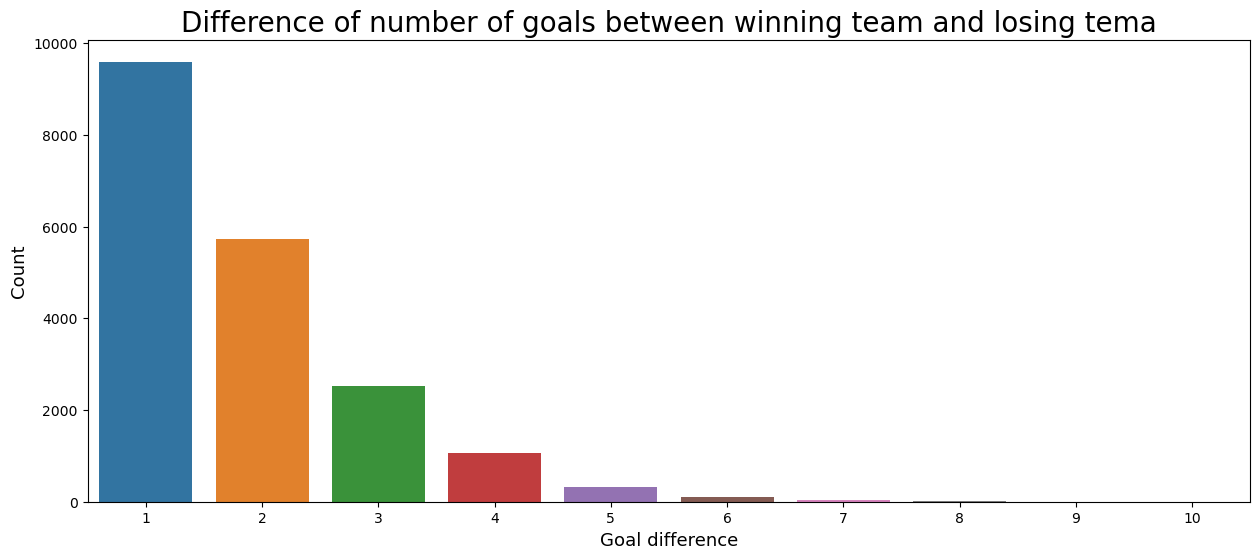

In [453]:
plt.figure(figsize = (15, 6))
sns.countplot(x = abs(df_match_basic[df_match_basic.match_result != "draw"].home_team_goal - 
                      df_match_basic[df_match_basic.match_result != "draw"].away_team_goal))
plt.title("Difference of number of goals between winning team and losing tema", fontsize = 20)
plt.xlabel("Goal difference", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

- Almost half of the matches are won by a difference of only one goal.


### Q. The difference of number of goals between home and away team.

Text(0, 0.5, 'Count')

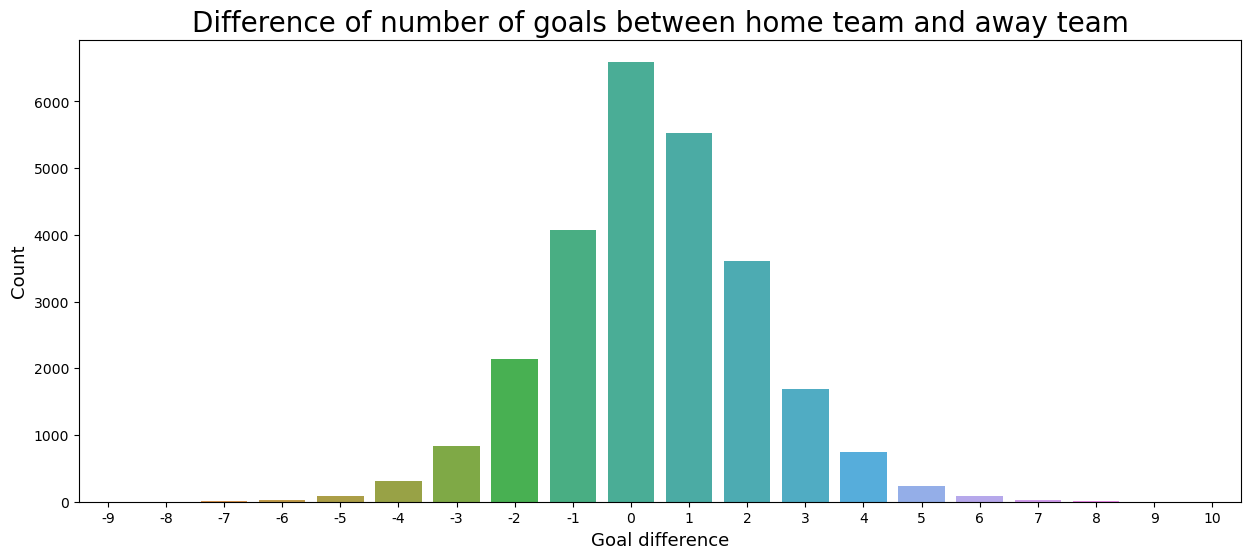

In [454]:
plt.figure(figsize = (15, 6))
sns.countplot(x = df_match_basic.home_team_goal - df_match_basic.away_team_goal)
plt.title("Difference of number of goals between home team and away team", fontsize = 20)
plt.xlabel("Goal difference", fontsize = 13)
plt.ylabel("Count", fontsize = 13)

- The side larger than 0 in the distribution is slightly thicker than the smaller side.
- That is, home team usually scores more goals than the away team.

### Q. What is the difference between home and away team win rates?

In [455]:
df_match_basic.match_result.value_counts()

home_win    11917
away_win     7466
draw         6596
Name: match_result, dtype: int64

Text(0, 0.5, 'Count')

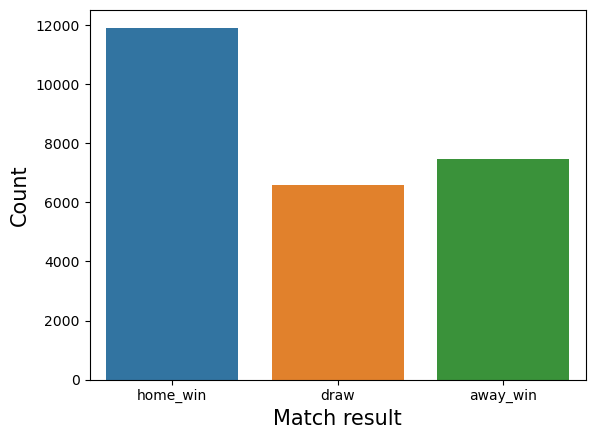

In [456]:
sns.countplot(x = df_match_basic.match_result,
              order = ["home_win", "draw", "away_win"])
plt.xlabel("Match result", fontsize = 15)
plt.ylabel("Count", fontsize = 15)

- Out of a total of 25979 matches
    - About 45% (11917 / 25979) were won by the home team
    - About 25% (6596 / 25979) were draw
    - About 29% (7466 / 25979) were won by the away team   

$\color{magenta} \quad \rightarrow$ <font color="magenta"> This percentage can be used as a baseline accuracy later. </font>

### Q. Is there a difference in the distribution of home and away team goals by league?

In [457]:
df_match_basic.groupby("league_name").home_team_goal.describe()

,count,mean,std,min,25%,50%,75%,max
league_name,,,,,,,,
Belgium Jupiler League,1728.0,1.609375,1.293458,0.0,1.0,1.0,2.0,7.0
England Premier League,3040.0,1.550987,1.311615,0.0,1.0,1.0,2.0,9.0
France Ligue 1,3040.0,1.402961,1.170743,0.0,1.0,1.0,2.0,6.0
Germany 1. Bundesliga,2448.0,1.626634,1.339529,0.0,1.0,1.0,2.0,9.0
Italy Serie A,3017.0,1.500829,1.221797,0.0,1.0,1.0,2.0,7.0
Netherlands Eredivisie,2448.0,1.779820,1.405274,0.0,1.0,2.0,3.0,10.0
Poland Ekstraklasa,1920.0,1.394792,1.183249,0.0,0.0,1.0,2.0,6.0
Portugal Liga ZON Sagres,2052.0,1.408382,1.226192,0.0,0.0,1.0,2.0,8.0
Scotland Premier League,1824.0,1.429276,1.294928,0.0,0.0,1.0,2.0,9.0


Text(0.5, 1.0, 'Home team average goals per game')

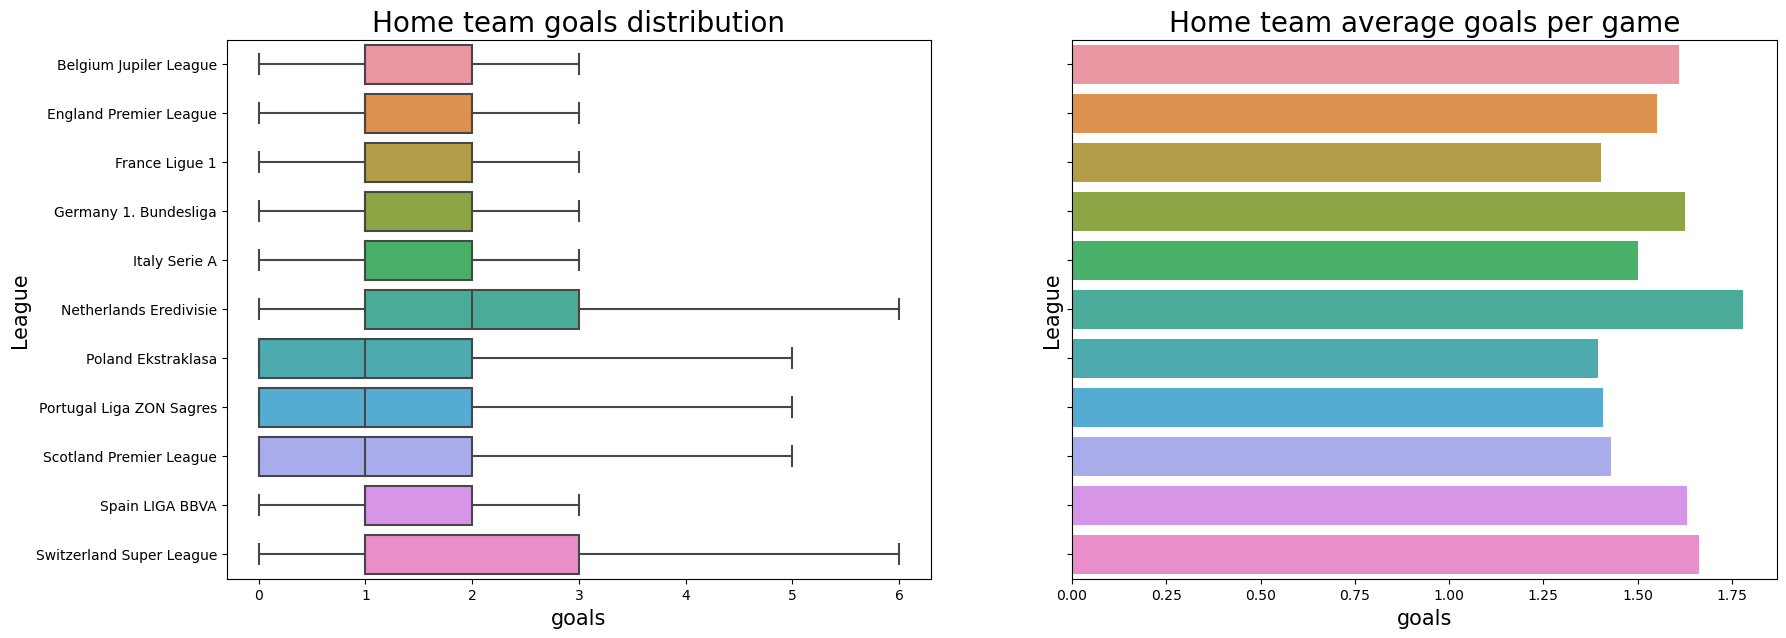

In [458]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7), sharey = True)

sns.boxplot(data = df_match_basic, x = "home_team_goal", y = "league_name", showfliers = False, ax = axes[0])
axes[0].set_xlabel("goals", fontsize = 15)
axes[0].set_ylabel("League", fontsize = 15)
axes[0].set_title("Home team goals distribution", fontsize = 20)

sns.barplot(df_match_basic.groupby("league_name").home_team_goal.describe().reset_index(), x = "mean", y = "league_name")
axes[1].set_xlabel("goals", fontsize = 15)
axes[1].set_ylabel("League", fontsize = 15)
axes[1].set_title("Home team average goals per game", fontsize = 20)

- Looking at the distribution of the number of home team goals by league over 8 seasons, it can be seen that the Dutch and Swiss leagues have more home team goals than other leagues.
- Average Home team goals per game are around 1.5 across all leagues.
- In the case of the France, Poland, Portugal, and Scotland, home team average goals per game are slightly lower than other leagues.
- In the case of the Netherland, home team average goals per game are slightly higher than other leagues.

In [459]:
df_match_basic.groupby("league_name").away_team_goal.describe()

,count,mean,std,min,25%,50%,75%,max
league_name,,,,,,,,
Belgium Jupiler League,1728.0,1.192130,1.125123,0.0,0.0,1.0,2.0,7.0
England Premier League,3040.0,1.159539,1.144629,0.0,0.0,1.0,2.0,6.0
France Ligue 1,3040.0,1.040132,1.059765,0.0,0.0,1.0,2.0,9.0
Germany 1. Bundesliga,2448.0,1.274918,1.200392,0.0,0.0,1.0,2.0,8.0
Italy Serie A,3017.0,1.116009,1.078392,0.0,0.0,1.0,2.0,7.0
Netherlands Eredivisie,2448.0,1.301062,1.240430,0.0,0.0,1.0,2.0,6.0
Poland Ekstraklasa,1920.0,1.030208,1.046159,0.0,0.0,1.0,2.0,6.0
Portugal Liga ZON Sagres,2052.0,1.126218,1.155469,0.0,0.0,1.0,2.0,6.0
Scotland Premier League,1824.0,1.204496,1.151384,0.0,0.0,1.0,2.0,6.0


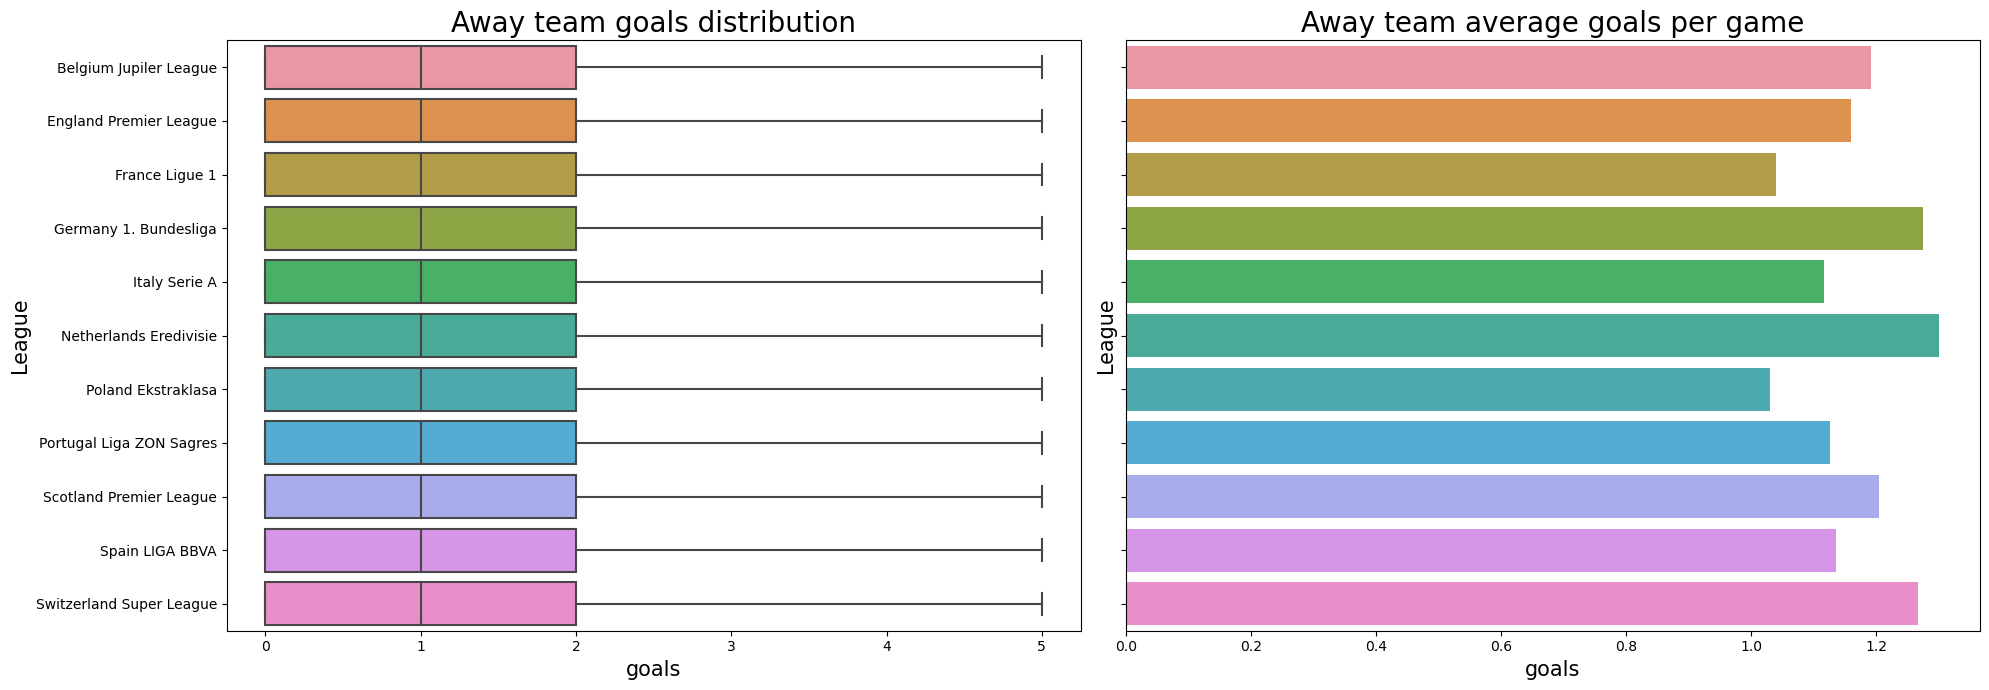

In [460]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7), sharey = True)

sns.boxplot(data = df_match_basic, x = "away_team_goal", y = "league_name", showfliers = False, ax = axes[0])
axes[0].set_xlabel("goals", fontsize = 15)
axes[0].set_ylabel("League", fontsize = 15)
axes[0].set_title("Away team goals distribution", fontsize = 20)

sns.barplot(df_match_basic.groupby("league_name").away_team_goal.describe().reset_index(), x = "mean", y = "league_name")
axes[1].set_xlabel("goals", fontsize = 15)
axes[1].set_ylabel("League", fontsize = 15)
axes[1].set_title("Away team average goals per game", fontsize = 20)

plt.tight_layout()

- The away team's goals distribution over the eight seasons shows a nearly identical distribution across all leagues compared to the home team's goals distributions.
- Away teams score around 1.1 goals per game on average across all leagues.
- In the case of the France and the Poland, away team average goals per game are slightly lower than other leagues.  
- In the case of the Germany, Netherlands, and Switzeland, away team average goals per game are slightly higher than other leagues.

- Average home and away team goals per game vary by league.   

$\color{magenta} \quad \rightarrow$ <font color="magenta"> There is a difference in the average goals of home and away teams in each league, so it is a good idea to try fitting our model differently for each league later. </font>

### Q. What is the difference between home and away team win rates between leagues ?

In [461]:
df_match_result_pivot = df_match_basic.pivot_table(index = "league_name", columns = "match_result", values = "stage", aggfunc = "count")
df_match_result_pivot["sum"] = df_match_result_pivot.sum(axis = 1)

match_result_prop = df_match_result_pivot[["home_win", "away_win", "draw"]].divide(df_match_result_pivot["sum"], axis = 0).multiply(100)


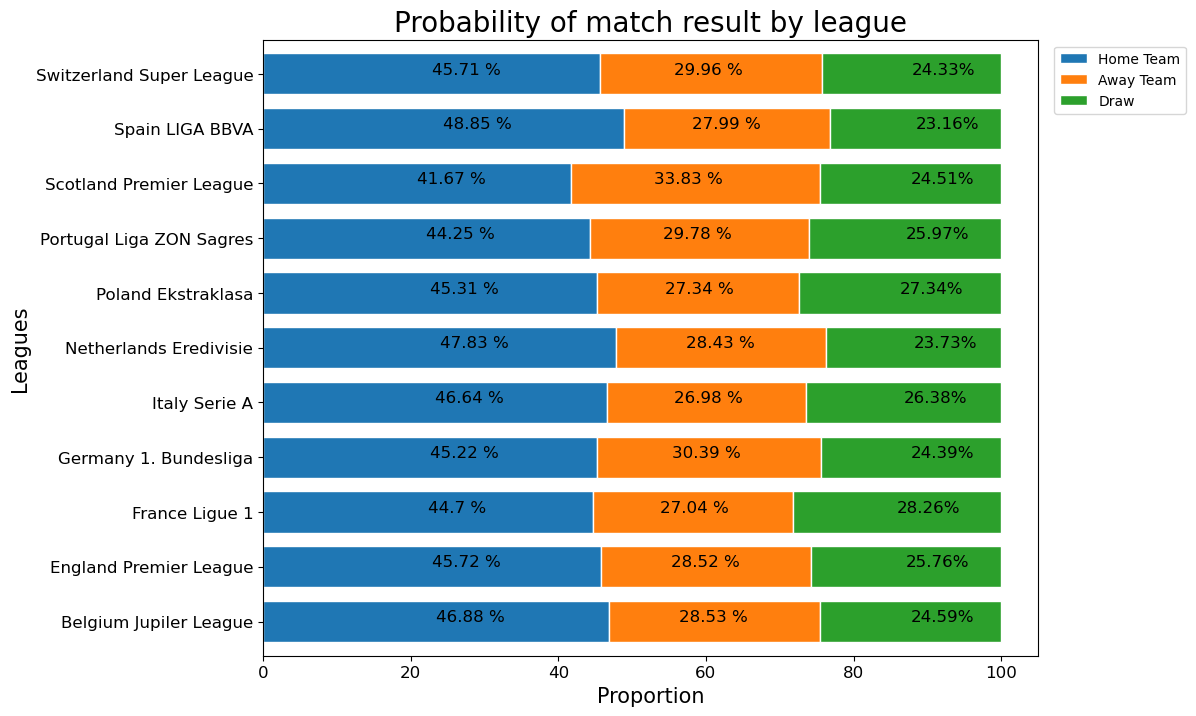

In [462]:
ax = match_result_prop.plot.barh(stacked = True, figsize = (10, 8), width = 0.75, edgecolor = 'w')
ax.legend(['Home Team','Away Team','Draw'], bbox_to_anchor = (1.2, 1), loc = 'upper right')
plt.title('Probability of match result by league', fontsize = 20)
plt.xlabel('Proportion',fontsize = 15)
plt.ylabel('Leagues', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

for  i, j in enumerate(match_result_prop.index):
    plt.text(match_result_prop.loc[j, 'home_win']/2, i, str(round(match_result_prop.loc[j, 'home_win'], 2)) + ' %', fontsize = 12)
    plt.text(match_result_prop.loc[j, 'home_win'] + match_result_prop.loc[j,'away_win']/3, i, str(round(match_result_prop.loc[j,'away_win'], 2)) + ' %',fontsize = 12)
    plt.text(match_result_prop.loc[j, 'home_win'] + match_result_prop.loc[j,'away_win']+ match_result_prop.loc[j, 'draw']/2, i, str(round(match_result_prop.loc[j, 'draw'], 2)) + '%', fontsize = 12)


- The overall tendency for the home team to have the highest win rate and the lowest draw rate is similar across leagues.
- However, there are some differences in the detailed ratio.

$\color{magenta} \quad \rightarrow$ <font color="magenta"> This league-specific ratios can later be used as the baseline accuracy for each league when fitting the model for each league. </font>



### Q. How strong is the relationship between home and away average goals and wins ?

- Usually, the home team scores more goals and the away team scores fewer goals, so the home team has a higher win rate.
- It is important for us to predict in which matches the home team will lose, the away team will win, and neither team will win.

- So let's try to figure out the relationship between how many goals are scored at home & away and the winning percentage.

In [463]:
df_team = pd.read_csv("../data/df_team.csv")

In [464]:
distinct_team = df_team[["team_api_id", "team_long_name"]].drop_duplicates()

In [465]:
goal_match_result_info = distinct_team.merge(df_match_basic.groupby("home_team_api_id").mean().home_team_goal.reset_index().rename(columns = {"home_team_api_id" : "team_api_id",
                                                                                                 "home_team_goal" : "home_avg_goal"}),
                                             how = "left", on = "team_api_id")

In [466]:
goal_match_result_info = goal_match_result_info.merge(df_match_basic.groupby("home_team_api_id").mean().away_team_goal.reset_index().rename(columns = {"home_team_api_id" : "team_api_id",
                                                                                                 "away_team_goal" : "home_opponent_avg_goal"}),
                                                      how = "left", on = "team_api_id")

In [467]:
goal_match_result_info = goal_match_result_info.merge(df_match_basic.groupby("away_team_api_id").mean().away_team_goal.reset_index().rename(columns = {"away_team_api_id" : "team_api_id",
                                                                                                 "away_team_goal" : "away_avg_goal"}),
                                                      how = "left", on = "team_api_id")

In [468]:
goal_match_result_info = goal_match_result_info.merge(df_match_basic.groupby("away_team_api_id").mean().home_team_goal.reset_index().rename(columns = {"away_team_api_id" : "team_api_id",
                                                                                                 "home_team_goal" : "away_opponent_avg_goal"}),
                                                      how = "left", on = "team_api_id")

In [469]:
result_from_home = df_match_basic.groupby(["home_team_api_id", "match_result"]).count().match_api_id.reset_index() \
                                 .pivot_table(index = "home_team_api_id", columns = "match_result", values = "match_api_id").reset_index()

In [470]:
result_from_home = result_from_home.rename(columns = {"home_team_api_id" : "team_api_id", "home_win": "win_at_home", 
                                                      "draw": "draw_at_home", "away_win": "lose_at_home"})

In [471]:
result_from_home["num_home_matches"] = result_from_home.win_at_home + result_from_home.draw_at_home + result_from_home.lose_at_home
result_from_home["win_at_home"] = result_from_home.win_at_home / result_from_home.num_home_matches  
result_from_home["draw_at_home"] = result_from_home.draw_at_home / result_from_home.num_home_matches  
result_from_home["lose_at_home"] = result_from_home.lose_at_home / result_from_home.num_home_matches  


In [472]:
result_from_home.drop("num_home_matches", axis = 1, inplace = True)

In [473]:
result_from_away = df_match_basic.groupby(["away_team_api_id", "match_result"]).count().match_api_id.reset_index() \
                                 .pivot_table(index = "away_team_api_id", columns = "match_result", values = "match_api_id").reset_index()

In [474]:
result_from_away = df_match_basic.groupby(["away_team_api_id", "match_result"]).count().match_api_id.reset_index() \
                                 .pivot_table(index = "away_team_api_id", columns = "match_result", values = "match_api_id").reset_index()

In [475]:
result_from_away = result_from_away.rename(columns = {"away_team_api_id" : "team_api_id", "home_win": "lose_at_away", 
                                                      "draw": "draw_at_away", "away_win": "win_at_away"})

In [476]:
result_from_away["num_away_matches"] = result_from_away.win_at_away + result_from_away.draw_at_away + result_from_away.lose_at_away
result_from_away["win_at_away"] = result_from_away.win_at_away / result_from_away.num_away_matches  
result_from_away["draw_at_away"] = result_from_away.draw_at_away / result_from_away.num_away_matches  
result_from_away["lose_at_away"] = result_from_away.lose_at_away / result_from_away.num_away_matches  

In [477]:
result_from_away.drop("num_away_matches", axis = 1, inplace = True)

In [478]:
result_from_away

match_result,team_api_id,win_at_away,draw_at_away,lose_at_away
0,1601,0.316667,0.241667,0.441667
1,1773,0.133333,0.333333,0.533333
2,1957,0.200000,0.308333,0.491667
3,2033,0.173333,0.373333,0.453333
4,2182,0.416667,0.275000,0.308333
...,...,...,...,...
294,158085,0.204082,0.367347,0.428571
295,177361,0.200000,0.333333,0.466667
296,188163,0.294118,0.117647,0.588235
297,208931,0.157895,0.315789,0.526316


In [479]:
goal_match_result_info = goal_match_result_info.merge(result_from_home[["team_api_id", "win_at_home", "draw_at_home", "lose_at_home"]], how = "left", on = "team_api_id") \
                                               .merge(result_from_away[["team_api_id", "win_at_away", "draw_at_away", "lose_at_away"]], how = "left", on = "team_api_id")

In [480]:
goal_match_result_info

,team_api_id,team_long_name,home_avg_goal,home_opponent_avg_goal,away_avg_goal,away_opponent_avg_goal,win_at_home,draw_at_home,lose_at_home,win_at_away,draw_at_away,lose_at_away
0,9930,FC Aarau,1.236111,1.652778,0.888889,2.152778,0.347222,0.166667,0.486111,0.138889,0.305556,0.555556
1,8485,Aberdeen,1.223684,0.967105,1.177632,1.381579,0.440789,0.250000,0.309211,0.348684,0.243421,0.407895
2,8576,AC Ajaccio,1.122807,1.350877,0.912281,1.877193,0.280702,0.333333,0.385965,0.105263,0.368421,0.526316
3,8564,Milan,1.794702,0.847682,1.480263,1.210526,0.609272,0.225166,0.165563,0.407895,0.296053,0.296053
4,10215,Académica de Coimbra,1.096774,1.258065,0.838710,1.532258,0.282258,0.387097,0.330645,0.169355,0.274194,0.556452
...,...,...,...,...,...,...,...,...,...,...,...,...
283,10192,BSC Young Boys,2.230769,1.160839,1.468531,1.447552,0.594406,0.237762,0.167832,0.398601,0.244755,0.356643
284,8021,Zagłębie Lubin,1.288889,1.200000,1.011111,1.377778,0.388889,0.300000,0.311111,0.266667,0.266667,0.466667
285,8394,Real Zaragoza,1.250000,1.328947,0.842105,1.828947,0.381579,0.223684,0.394737,0.184211,0.223684,0.592105
286,8027,Zawisza Bydgoszcz,1.433333,1.266667,1.066667,1.700000,0.433333,0.166667,0.400000,0.200000,0.300000,0.500000


In [481]:
target_team_api = goal_match_result_info.sort_values("win_at_home", ascending = False).iloc[:25].team_api_id
goal_match_result_info.loc[goal_match_result_info.team_api_id.isin(target_team_api), "home_win_class"] = "home_win_best_10%_teams"

target_team_api = goal_match_result_info.sort_values("win_at_home").iloc[:25].team_api_id
goal_match_result_info.loc[goal_match_result_info.team_api_id.isin(target_team_api), "home_win_class"] = "home_win_worst_10%_teams"

target_team_api = goal_match_result_info.sort_values("win_at_away", ascending = False).iloc[:25].team_api_id
goal_match_result_info.loc[goal_match_result_info.team_api_id.isin(target_team_api), "away_win_class"] = "away_win_best_10%_teams"

target_team_api = goal_match_result_info.sort_values("win_at_away").iloc[:25].team_api_id
goal_match_result_info.loc[goal_match_result_info.team_api_id.isin(target_team_api), "away_win_class"] = "away_win_worst_10%_teams"


In [482]:
goal_match_result_info

,team_api_id,team_long_name,home_avg_goal,home_opponent_avg_goal,away_avg_goal,away_opponent_avg_goal,win_at_home,draw_at_home,lose_at_home,win_at_away,draw_at_away,lose_at_away,home_win_class,away_win_class
0,9930,FC Aarau,1.236111,1.652778,0.888889,2.152778,0.347222,0.166667,0.486111,0.138889,0.305556,0.555556,NaN,NaN
1,8485,Aberdeen,1.223684,0.967105,1.177632,1.381579,0.440789,0.250000,0.309211,0.348684,0.243421,0.407895,NaN,NaN
2,8576,AC Ajaccio,1.122807,1.350877,0.912281,1.877193,0.280702,0.333333,0.385965,0.105263,0.368421,0.526316,NaN,away_win_worst_10%_teams
3,8564,Milan,1.794702,0.847682,1.480263,1.210526,0.609272,0.225166,0.165563,0.407895,0.296053,0.296053,NaN,NaN
4,10215,Académica de Coimbra,1.096774,1.258065,0.838710,1.532258,0.282258,0.387097,0.330645,0.169355,0.274194,0.556452,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,10192,BSC Young Boys,2.230769,1.160839,1.468531,1.447552,0.594406,0.237762,0.167832,0.398601,0.244755,0.356643,NaN,NaN
284,8021,Zagłębie Lubin,1.288889,1.200000,1.011111,1.377778,0.388889,0.300000,0.311111,0.266667,0.266667,0.466667,NaN,NaN
285,8394,Real Zaragoza,1.250000,1.328947,0.842105,1.828947,0.381579,0.223684,0.394737,0.184211,0.223684,0.592105,NaN,NaN
286,8027,Zawisza Bydgoszcz,1.433333,1.266667,1.066667,1.700000,0.433333,0.166667,0.400000,0.200000,0.300000,0.500000,NaN,NaN


Text(0.5, 0.98, 'Histogram of 299 soccer teams')

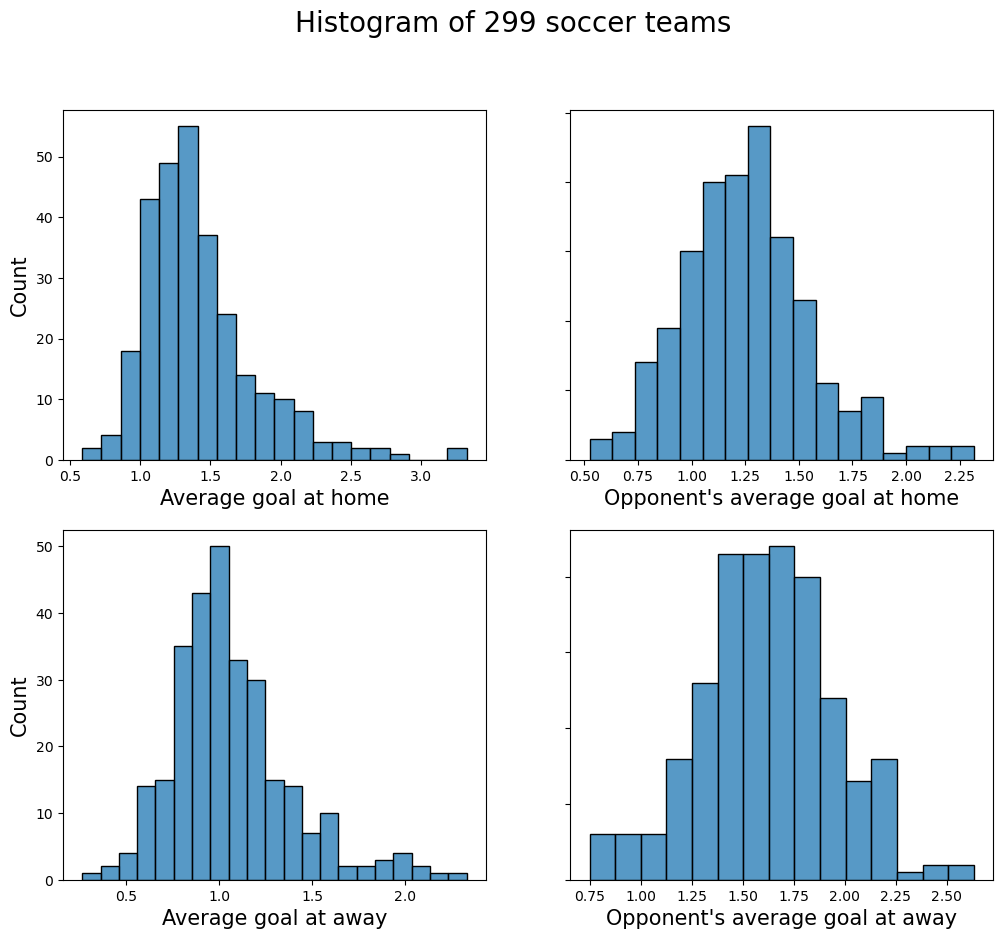

In [483]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

sns.histplot(goal_match_result_info, x = "home_avg_goal", ax = axes[0, 0])
sns.histplot(goal_match_result_info, x = "home_opponent_avg_goal", ax = axes[0, 1])

axes[0, 0].set_xlabel("Average goal at home", fontsize = 15)
axes[0, 0].set_ylabel("Count", fontsize = 15)

axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("Opponent's average goal at home", fontsize = 15)
axes[0, 1].yaxis.set_tick_params(labelleft = False)

sns.histplot(goal_match_result_info, x = "away_avg_goal", ax = axes[1, 0])
sns.histplot(goal_match_result_info, x = "away_opponent_avg_goal", ax = axes[1, 1])

axes[1, 0].set_xlabel("Average goal at away", fontsize = 15)
axes[1, 0].set_ylabel("Count", fontsize = 15)

axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("Opponent's average goal at away", fontsize = 15)
axes[1, 1].yaxis.set_tick_params(labelleft = False)

plt.suptitle("Histogram of 299 soccer teams", fontsize = 20)


- It can be seen that the ability to score goals or block goals in home/away matches is very different for each team.
- These differences will affect home and away win rates for each team.

- Let's compare the best and worst 10% teams with the win rate at home.

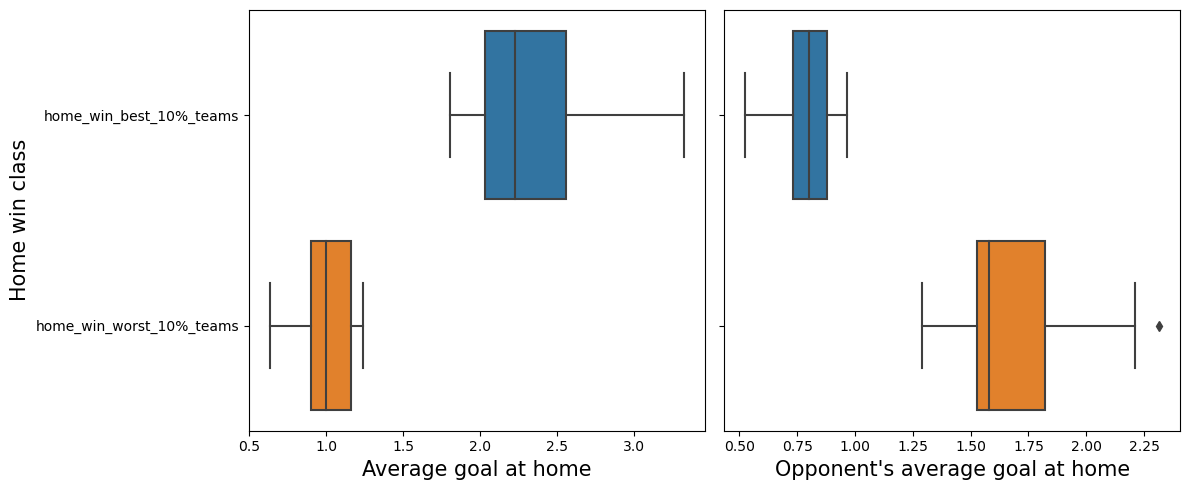

In [484]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(goal_match_result_info, x = "home_avg_goal", y = "home_win_class", ax = axes[0])
sns.boxplot(goal_match_result_info, x = "home_opponent_avg_goal", y = "home_win_class", ax = axes[1])

axes[0].set_ylabel("Home win class", fontsize = 15)
axes[0].set_xlabel("Average goal at home", fontsize = 15)

axes[1].set_ylabel("")
axes[1].set_xlabel("Opponent's average goal at home", fontsize = 15)
axes[1].yaxis.set_tick_params(labelleft = False)

plt.tight_layout()

- Teams in the best 10% of home win percentage score an average of 1.2 more goals at home than teams in the worst 10%.
- For the best 10% teams with high win percentage at home, the average number of goals scored by the opposing team is around 0.8, very low compared to 1.6 from the worst 10% teams.  


In [485]:
goal_match_result_info

,team_api_id,team_long_name,home_avg_goal,home_opponent_avg_goal,away_avg_goal,away_opponent_avg_goal,win_at_home,draw_at_home,lose_at_home,win_at_away,draw_at_away,lose_at_away,home_win_class,away_win_class
0,9930,FC Aarau,1.236111,1.652778,0.888889,2.152778,0.347222,0.166667,0.486111,0.138889,0.305556,0.555556,NaN,NaN
1,8485,Aberdeen,1.223684,0.967105,1.177632,1.381579,0.440789,0.250000,0.309211,0.348684,0.243421,0.407895,NaN,NaN
2,8576,AC Ajaccio,1.122807,1.350877,0.912281,1.877193,0.280702,0.333333,0.385965,0.105263,0.368421,0.526316,NaN,away_win_worst_10%_teams
3,8564,Milan,1.794702,0.847682,1.480263,1.210526,0.609272,0.225166,0.165563,0.407895,0.296053,0.296053,NaN,NaN
4,10215,Académica de Coimbra,1.096774,1.258065,0.838710,1.532258,0.282258,0.387097,0.330645,0.169355,0.274194,0.556452,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,10192,BSC Young Boys,2.230769,1.160839,1.468531,1.447552,0.594406,0.237762,0.167832,0.398601,0.244755,0.356643,NaN,NaN
284,8021,Zagłębie Lubin,1.288889,1.200000,1.011111,1.377778,0.388889,0.300000,0.311111,0.266667,0.266667,0.466667,NaN,NaN
285,8394,Real Zaragoza,1.250000,1.328947,0.842105,1.828947,0.381579,0.223684,0.394737,0.184211,0.223684,0.592105,NaN,NaN
286,8027,Zawisza Bydgoszcz,1.433333,1.266667,1.066667,1.700000,0.433333,0.166667,0.400000,0.200000,0.300000,0.500000,NaN,NaN


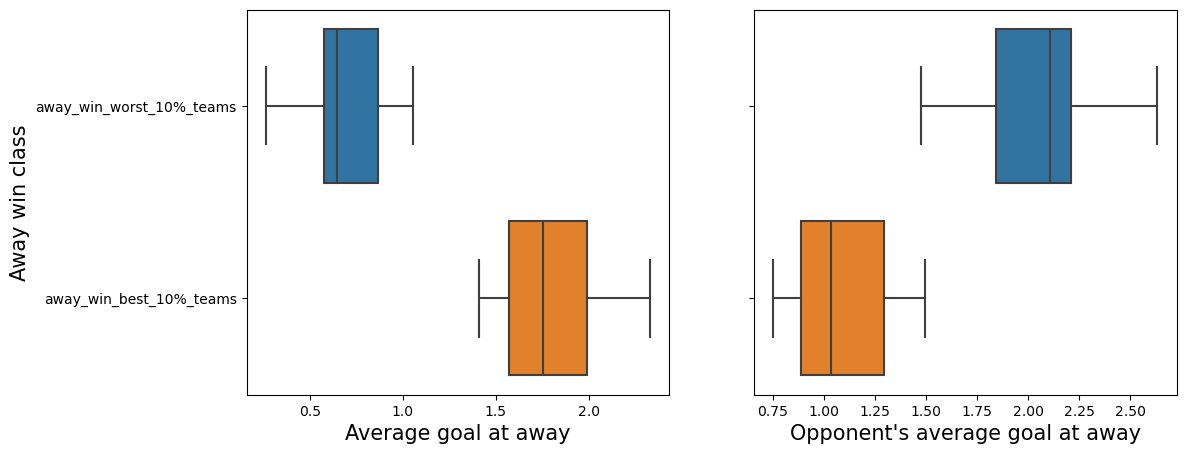

In [486]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(goal_match_result_info, x = "away_avg_goal", y = "away_win_class", ax = axes[0])
sns.boxplot(goal_match_result_info, x = "away_opponent_avg_goal", y = "away_win_class", ax = axes[1])

axes[0].set_ylabel("Away win class", fontsize = 15)
axes[0].set_xlabel("Average goal at away", fontsize = 15)

axes[1].set_ylabel("")
axes[1].set_xlabel("Opponent's average goal at away", fontsize = 15)
axes[1].yaxis.set_tick_params(labelleft = False)

- Teams in the best 10% of away win percentage score an average of 1.2 more goals at away than teams in the worst 10%.
- For the best 10% teams with high win percentage at away, the average number of goals scored by the opposing team is around 1, very low compared to 2.2 from the worst 10% teams.


$\color{magenta} \quad \rightarrow$ <font color="magenta"> So, let's create a variable for each team that indicates how well they score goals when home, how well they block goals when home, how well they score goals when away, and how well they block goals when away:    
$\quad \quad$ - Each team's last 1 / 3 / 5 / 10 / 20 / 30 / 60 / 90 matches    
$\quad \quad \quad \quad$ - average goal at home $\\$
$\quad \quad \quad \quad$ - average opponent's goal at home $\\$
$\quad \quad \quad \quad$ - average goal at away $\\$
$\quad \quad \quad \quad$ - average opponent's goal at away $\\$
</font>

In [487]:
home_goal_info = df_match_basic[["home_team_api_id", "match_date", "season", "home_team_goal", "away_team_goal"]].sort_values(["home_team_api_id", "match_date"])

In [488]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    home_goal_info[f"home_team_avg_goal_at_home_last_{i}_matches"] = home_goal_info.groupby('home_team_api_id')['home_team_goal'].shift(1).rolling(i).mean()
    home_goal_info[f"home_team_avg_oppnt_goal_at_home_last_{i}_matches"] = home_goal_info.groupby('home_team_api_id')['away_team_goal'].shift(1).rolling(i).mean()

In [489]:
away_goal_info = df_match_basic[["away_team_api_id", "match_date", "season", "home_team_goal", "away_team_goal"]].sort_values(["away_team_api_id", "match_date"])

In [490]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    away_goal_info[f"away_team_avg_goal_at_away_last_{i}_matches"] = away_goal_info.groupby('away_team_api_id')['away_team_goal'].shift(1).rolling(i).mean()
    away_goal_info[f"away_team_avg_oppnt_goal_at_away_last_{i}_matches"] = away_goal_info.groupby('away_team_api_id')['home_team_goal'].shift(1).rolling(i).mean()

In [491]:
df_team_win_goal_rolling_features = df_match_basic[["match_api_id", "match_date", "home_team_api_id", "away_team_api_id"]]

In [492]:
df_team_win_goal_rolling_features = df_team_win_goal_rolling_features.merge(home_goal_info.drop(["season", "home_team_goal", "away_team_goal"], axis = 1), how = "left", on = ["match_date", "home_team_api_id"]) \
                                                                     .merge(away_goal_info.drop(["season", "home_team_goal", "away_team_goal"], axis = 1), how = "left", on = ["match_date", "away_team_api_id"]) 
                                                                    
df_team_win_goal_rolling_features                                                         

,match_api_id,match_date,home_team_api_id,away_team_api_id,home_team_avg_goal_at_home_last_1_matches,home_team_avg_oppnt_goal_at_home_last_1_matches,home_team_avg_goal_at_home_last_3_matches,home_team_avg_oppnt_goal_at_home_last_3_matches,home_team_avg_goal_at_home_last_5_matches,home_team_avg_oppnt_goal_at_home_last_5_matches,home_team_avg_goal_at_home_last_10_matches,home_team_avg_oppnt_goal_at_home_last_10_matches,home_team_avg_goal_at_home_last_20_matches,home_team_avg_oppnt_goal_at_home_last_20_matches,home_team_avg_goal_at_home_last_30_matches,home_team_avg_oppnt_goal_at_home_last_30_matches,home_team_avg_goal_at_home_last_60_matches,home_team_avg_oppnt_goal_at_home_last_60_matches,home_team_avg_goal_at_home_last_90_matches,home_team_avg_oppnt_goal_at_home_last_90_matches,away_team_avg_goal_at_away_last_1_matches,away_team_avg_oppnt_goal_at_away_last_1_matches,away_team_avg_goal_at_away_last_3_matches,away_team_avg_oppnt_goal_at_away_last_3_matches,away_team_avg_goal_at_away_last_5_matches,away_team_avg_oppnt_goal_at_away_last_5_matches,away_team_avg_goal_at_away_last_10_matches,away_team_avg_oppnt_goal_at_away_last_10_matches,away_team_avg_goal_at_away_last_20_matches,away_team_avg_oppnt_goal_at_away_last_20_matches,away_team_avg_goal_at_away_last_30_matches,away_team_avg_oppnt_goal_at_away_last_30_matches,away_team_avg_goal_at_away_last_60_matches,away_team_avg_oppnt_goal_at_away_last_60_matches,away_team_avg_goal_at_away_last_90_matches,away_team_avg_oppnt_goal_at_away_last_90_matches
0,492473,2008-08-17,9987,9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,2008-08-16,10000,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,2008-08-16,9984,8635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,2008-08-17,9991,9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,492477,2008-08-16,7947,9985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,2015-09-22,10190,10191,0.0,2.0,0.333333,1.666667,1.6,1.2,1.6,1.3,1.55,1.30,1.500000,1.333333,1.533333,1.133333,1.400000,1.311111,3.0,3.0,1.666667,3.000000,2.0,2.8,1.1,2.3,0.85,1.60,1.166667,1.600000,1.033333,1.500000,0.977778,1.377778
25975,1992092,2015-09-23,9824,10199,1.0,0.0,1.666667,1.333333,1.4,1.4,1.1,1.6,0.95,1.55,1.133333,1.866667,NaN,NaN,NaN,NaN,1.0,0.0,2.333333,0.666667,1.8,0.6,2.0,0.7,1.80,1.25,1.566667,1.533333,1.450000,1.633333,1.377778,1.588889
25976,1992093,2015-09-23,9956,10179,3.0,2.0,3.666667,2.000000,2.6,1.2,2.0,1.0,1.70,1.25,1.900000,1.333333,1.616667,1.133333,1.488889,1.222222,2.0,0.0,1.000000,1.333333,1.0,1.8,0.9,1.1,0.90,1.35,0.800000,1.366667,0.816667,1.550000,0.966667,1.355556
25977,1992094,2015-09-22,7896,10243,0.0,1.0,0.666667,1.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,1.333333,2.000000,1.4,1.6,1.2,1.9,1.60,1.45,1.566667,1.500000,1.583333,1.500000,1.566667,1.455556


- Also let's use the each team's win or lose percentage at home and away for recent 1 / 3 / 5 / 10 / 20 / 30 / 60 / 90 matches.

In [493]:
home_win_info = df_match_basic[["home_team_api_id", "match_date", "match_result"]].sort_values(["home_team_api_id", "match_date"])

In [494]:
home_win_info.loc[home_win_info.match_result == "home_win", "is_win"] = 1 
home_win_info.loc[home_win_info.match_result != "home_win", "is_win"] = 0 

home_win_info.loc[home_win_info.match_result == "away_win", "is_lose"] = 1
home_win_info.loc[home_win_info.match_result != "away_win", "is_lose"] = 0

In [495]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    home_win_info[f"home_team_home_win_percentage_last_{i}_matches"] = home_win_info.groupby('home_team_api_id')['is_win'].shift(1).rolling(i).mean()
    home_win_info[f"home_team_home_lose_percentage_last_{i}_matches"] = home_win_info.groupby('home_team_api_id')['is_lose'].shift(1).rolling(i).mean()

In [496]:
away_win_info = df_match_basic[["away_team_api_id", "match_date", "match_result"]].sort_values(["away_team_api_id", "match_date"])

In [497]:
away_win_info.loc[away_win_info.match_result == "away_win", "is_win"] = 1 
away_win_info.loc[away_win_info.match_result != "away_win", "is_win"] = 0 

away_win_info.loc[away_win_info.match_result == "home_win", "is_lose"] = 1
away_win_info.loc[away_win_info.match_result != "home_win", "is_lose"] = 0

In [498]:
for i in [1, 3, 5, 10, 20, 30, 60, 90]:
    away_win_info[f"away_team_away_win_percentage_last_{i}_matches"] = away_win_info.groupby('away_team_api_id')['is_win'].shift(1).rolling(i).mean()
    away_win_info[f"away_team_away_lose_percentage_last_{i}_matches"] = away_win_info.groupby('away_team_api_id')['is_lose'].shift(1).rolling(i).mean()

In [499]:
df_team_win_goal_rolling_features = df_team_win_goal_rolling_features.merge(home_win_info.drop(["match_result", "is_win", "is_lose"], axis = 1), how = "left", on = ["match_date", "home_team_api_id"]) \
                                                                     .merge(away_win_info.drop(["match_result", "is_win", "is_lose"], axis = 1), how = "left", on = ["match_date", "away_team_api_id"]) \
                                                                     .drop(["match_date", "home_team_api_id", "away_team_api_id"], axis = 1)
df_team_win_goal_rolling_features                                                         

,match_api_id,home_team_avg_goal_at_home_last_1_matches,home_team_avg_oppnt_goal_at_home_last_1_matches,home_team_avg_goal_at_home_last_3_matches,home_team_avg_oppnt_goal_at_home_last_3_matches,home_team_avg_goal_at_home_last_5_matches,home_team_avg_oppnt_goal_at_home_last_5_matches,home_team_avg_goal_at_home_last_10_matches,home_team_avg_oppnt_goal_at_home_last_10_matches,home_team_avg_goal_at_home_last_20_matches,home_team_avg_oppnt_goal_at_home_last_20_matches,home_team_avg_goal_at_home_last_30_matches,home_team_avg_oppnt_goal_at_home_last_30_matches,home_team_avg_goal_at_home_last_60_matches,home_team_avg_oppnt_goal_at_home_last_60_matches,home_team_avg_goal_at_home_last_90_matches,home_team_avg_oppnt_goal_at_home_last_90_matches,away_team_avg_goal_at_away_last_1_matches,away_team_avg_oppnt_goal_at_away_last_1_matches,away_team_avg_goal_at_away_last_3_matches,away_team_avg_oppnt_goal_at_away_last_3_matches,away_team_avg_goal_at_away_last_5_matches,away_team_avg_oppnt_goal_at_away_last_5_matches,away_team_avg_goal_at_away_last_10_matches,away_team_avg_oppnt_goal_at_away_last_10_matches,away_team_avg_goal_at_away_last_20_matches,away_team_avg_oppnt_goal_at_away_last_20_matches,away_team_avg_goal_at_away_last_30_matches,away_team_avg_oppnt_goal_at_away_last_30_matches,away_team_avg_goal_at_away_last_60_matches,away_team_avg_oppnt_goal_at_away_last_60_matches,away_team_avg_goal_at_away_last_90_matches,away_team_avg_oppnt_goal_at_away_last_90_matches,home_team_home_win_percentage_last_1_matches,home_team_home_lose_percentage_last_1_matches,home_team_home_win_percentage_last_3_matches,home_team_home_lose_percentage_last_3_matches,home_team_home_win_percentage_last_5_matches,home_team_home_lose_percentage_last_5_matches,home_team_home_win_percentage_last_10_matches,home_team_home_lose_percentage_last_10_matches,home_team_home_win_percentage_last_20_matches,home_team_home_lose_percentage_last_20_matches,home_team_home_win_percentage_last_30_matches,home_team_home_lose_percentage_last_30_matches,home_team_home_win_percentage_last_60_matches,home_team_home_lose_percentage_last_60_matches,home_team_home_win_percentage_last_90_matches,home_team_home_lose_percentage_last_90_matches,away_team_away_win_percentage_last_1_matches,away_team_away_lose_percentage_last_1_matches,away_team_away_win_percentage_last_3_matches,away_team_away_lose_percentage_last_3_matches,away_team_away_win_percentage_last_5_matches,away_team_away_lose_percentage_last_5_matches,away_team_away_win_percentage_last_10_matches,away_team_away_lose_percentage_last_10_matches,away_team_away_win_percentage_last_20_matches,away_team_away_lose_percentage_last_20_matches,away_team_away_win_percentage_last_30_matches,away_team_away_lose_percentage_last_30_matches,away_team_away_win_percentage_last_60_matches,away_team_away_lose_percentage_last_60_matches,away_team_away_win_percentage_last_90_matches,away_team_away_lose_percentage_last_90_matches
0,492473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,492474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,492475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,492476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

- Save the table.

In [500]:
df_team_win_goal_rolling_features.to_csv("../data/df_team_win_goal_rolling_features.csv", index = False)

## 1.3. Elapsed time of goals

### Q. Are there specific times when goals are scored most?

Text(0.5, 1.0, 'Histogram of the elapsed time of goals')

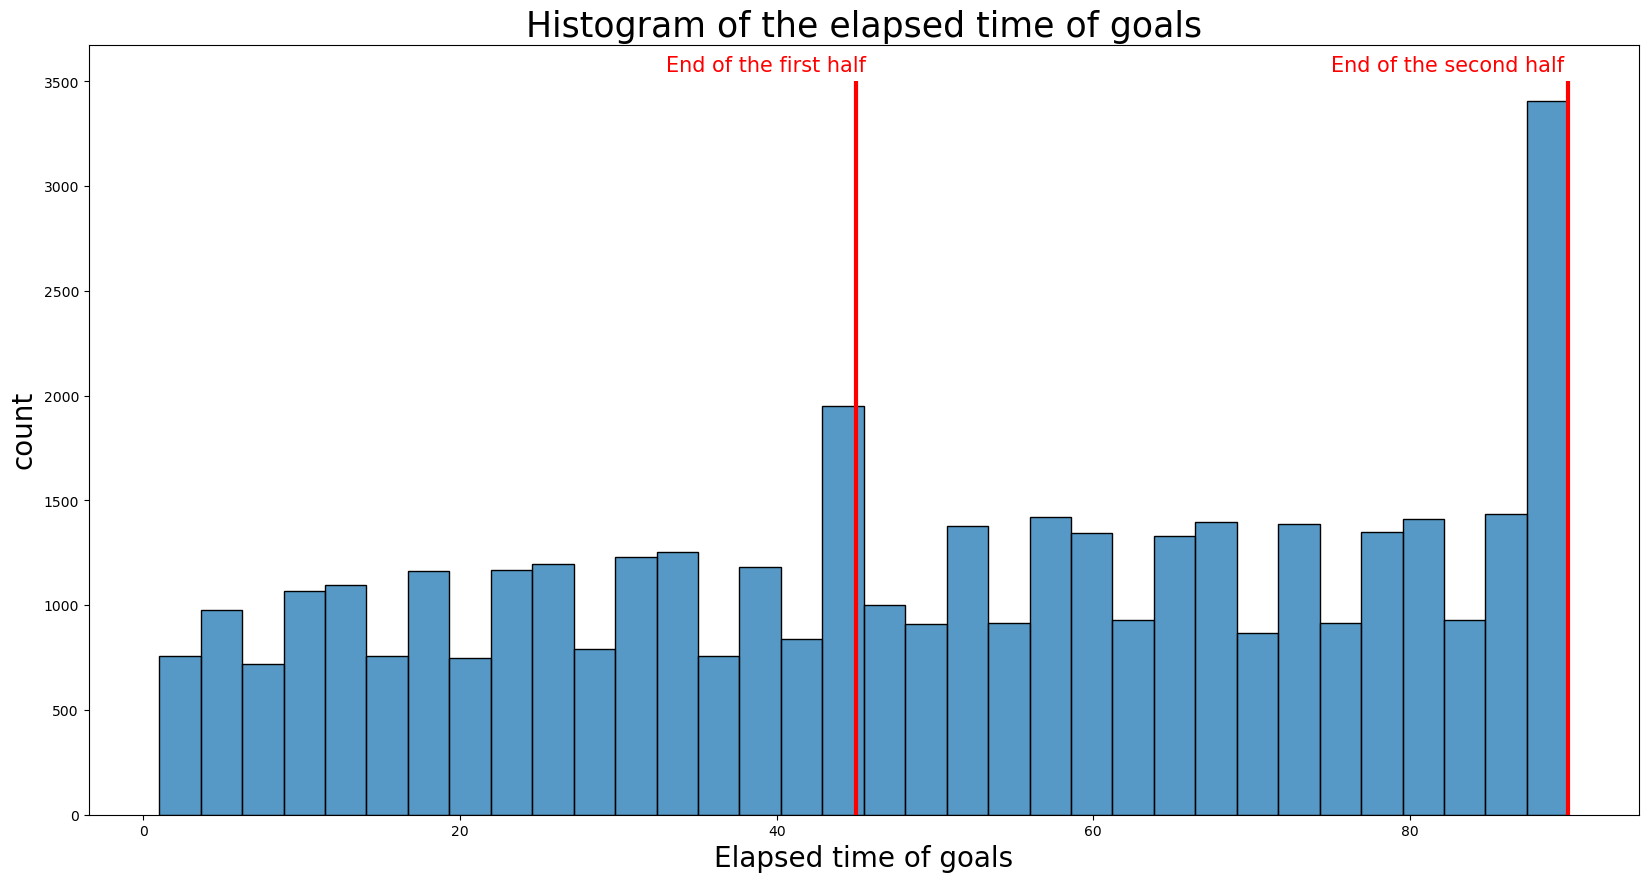

In [501]:
plt.figure(figsize = (20, 10))
sns.histplot(data = df_match_ingame_shot_goal, x = "elapsed")
plt.xlabel("Elapsed time of goals", fontsize = 20)
plt.ylabel("count", fontsize = 20)
plt.vlines(x = 45, ymin = 0, ymax = 3500, colors = "red", linewidth = 3)
plt.vlines(x = 90, ymin = 0, ymax = 3500, colors = "red", linewidth = 3)
plt.text(x = 33, y = 3550, s = "End of the first half", color = "red", fontsize = 15)
plt.text(x = 75, y = 3550, s = "End of the second half", color = "red", fontsize = 15)
plt.title("Histogram of the elapsed time of goals", fontsize = 25)

- Elapsed time of goals is almost uniformly distributed except for the right before the end of first and second half where a lot of goals are scored.

### Q: Is there any difference in the distribution of the elapsed time of goals between winning and losing team ?

In [502]:
df_match_ingame_shot_goal

,match_api_id,event_id,elapsed,team_api_id,category,type,subtype,player1_api_id,player2_api_id,match_date,match_result,season,home_away,league_name
0,489042,378998,22,10261.0,goal,n,header,37799.0,38807.0,2008-08-17,draw,2008/2009,away,England Premier League
1,489042,379019,24,10260.0,goal,n,shot,24148.0,24154.0,2008-08-17,draw,2008/2009,home,England Premier League
2,489043,375546,4,9825.0,goal,n,shot,26181.0,39297.0,2008-08-16,home_win,2008/2009,home,England Premier League
3,489044,378041,83,8650.0,goal,n,distance,30853.0,30889.0,2008-08-16,away_win,2008/2009,away,England Premier League
4,489045,376060,4,8654.0,goal,n,shot,23139.0,36394.0,2008-08-16,home_win,2008/2009,home,England Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39975,1992228,5640015,71,10192.0,goal,n,NaN,37554.0,NaN,2016-05-25,away_win,2015/2016,away,Switzerland Super League
39976,1992229,5639993,58,9824.0,goal,n,NaN,493418.0,NaN,2016-05-25,home_win,2015/2016,away,Switzerland Super League
39977,1992229,5640008,67,10243.0,goal,n,NaN,197757.0,NaN,2016-05-25,home_win,2015/2016,home,Switzerland Super League
39978,1992229,5640010,69,10243.0,goal,n,NaN,198082.0,NaN,2016-05-25,home_win,2015/2016,home,Switzerland Super League


In [503]:
win_team = pd.concat([df_match_ingame_shot_goal[(df_match_ingame_shot_goal.match_result == "home_win") & (df_match_ingame_shot_goal.home_away == "home")], 
                      df_match_ingame_shot_goal[(df_match_ingame_shot_goal.match_result == "away_win") & (df_match_ingame_shot_goal.home_away == "away")]])

lose_team = pd.concat([df_match_ingame_shot_goal[(df_match_ingame_shot_goal.match_result == "home_win") & (df_match_ingame_shot_goal.home_away == "away")], 
                      df_match_ingame_shot_goal[(df_match_ingame_shot_goal.match_result == "away_win") & (df_match_ingame_shot_goal.home_away == "home")]])

In [504]:
win_team["win_lose"] = "win_team"
lose_team["win_lose"] = "lose_team"

elapsed_win_lose = pd.concat([win_team[["elapsed", "win_lose"]], lose_team[["elapsed", "win_lose"]]])

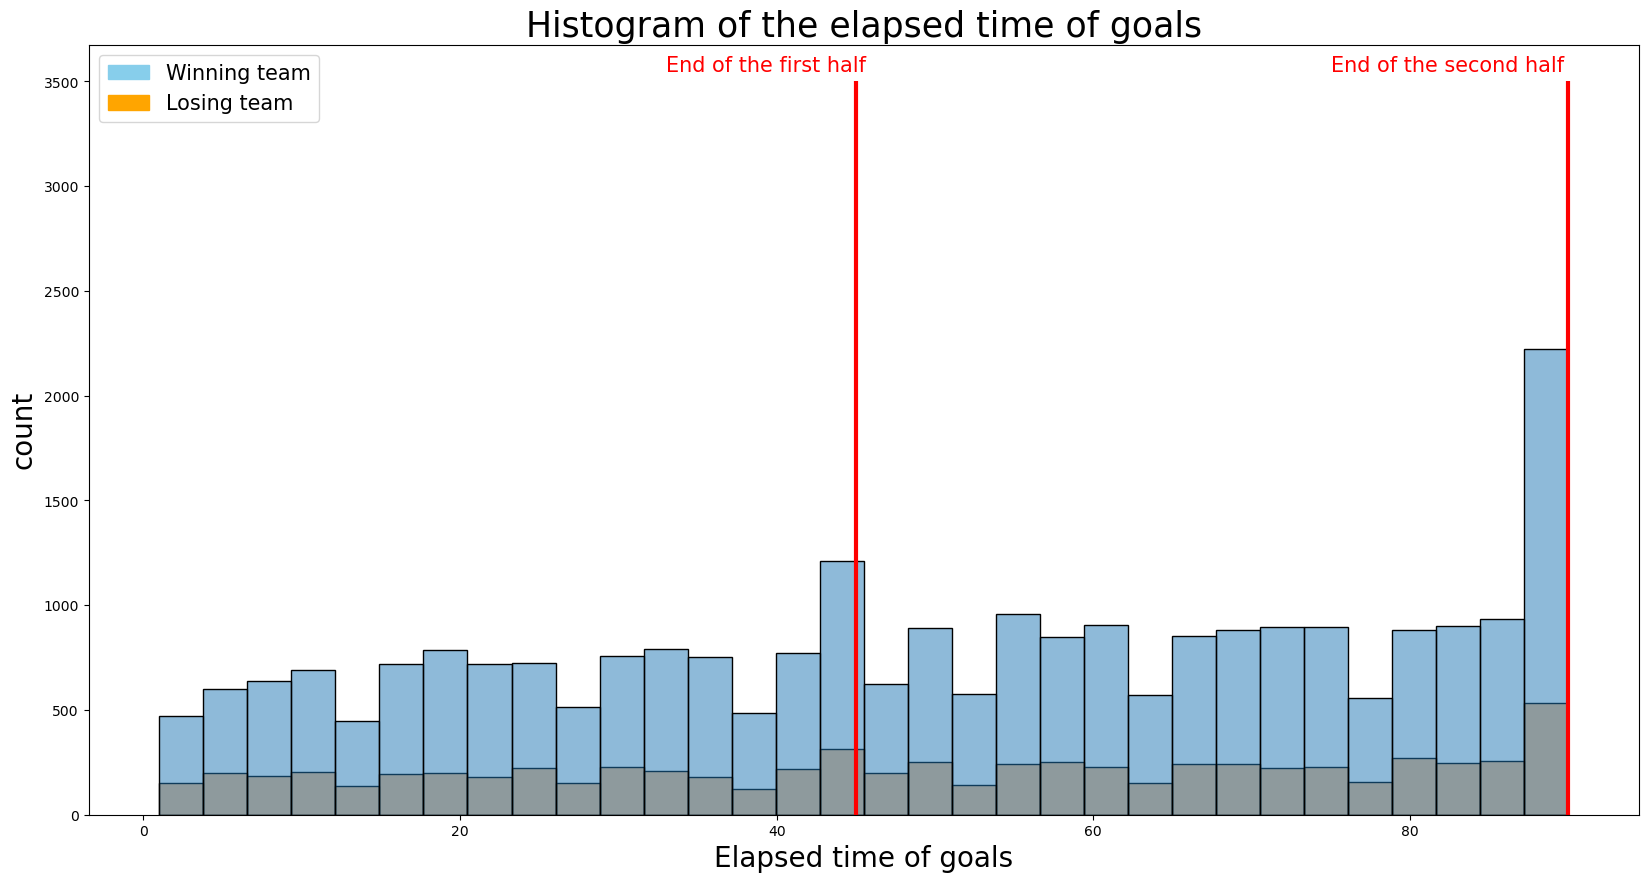

In [505]:
plt.figure(figsize = (20, 10))
sns.histplot(elapsed_win_lose, x = "elapsed", hue = "win_lose")
plt.xlabel("Elapsed time of goals", fontsize = 20)
plt.ylabel("count", fontsize = 20)
plt.vlines(x = 45, ymin = 0, ymax = 3500, colors = "red", linewidth = 3)
plt.vlines(x = 90, ymin = 0, ymax = 3500, colors = "red", linewidth = 3)
plt.text(x = 33, y = 3550, s = "End of the first half", color = "red", fontsize = 15)
plt.text(x = 75, y = 3550, s = "End of the second half", color = "red", fontsize = 15)
plt.title("Histogram of the elapsed time of goals", fontsize = 25)

top = mpatches.Patch(color = "skyblue", label = 'Winning team')
bottom = mpatches.Patch(color = "orange", label = 'Losing team')
plt.legend(handles=[top, bottom], loc = "upper left", fontsize = 15)


- The losing team scores fewer goals, but there is no difference in the overall shape of the distribution of elapsed time of goals between the winning and losing team.

### Q: Is there any difference in the distribution of the elapsed time of goals between home and away team ?

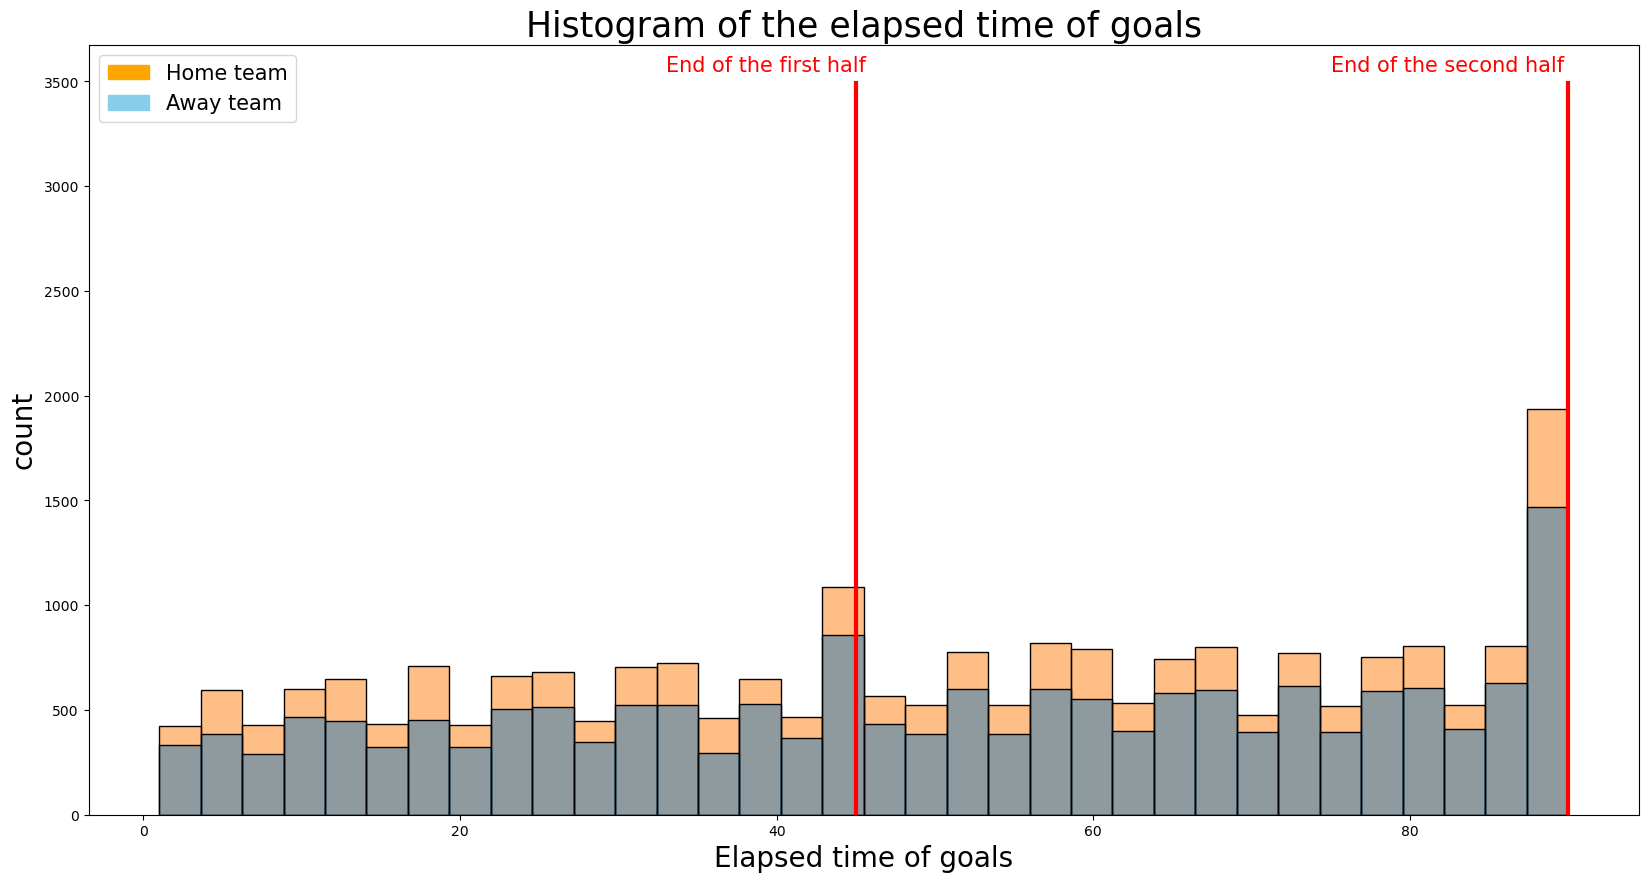

In [506]:
plt.figure(figsize = (20, 10))
sns.histplot(df_match_ingame_shot_goal, x = "elapsed", hue = "home_away")
plt.xlabel("Elapsed time of goals", fontsize = 20)
plt.ylabel("count", fontsize = 20)
plt.vlines(x = 45, ymin = 0, ymax = 3500, colors = "red", linewidth = 3)
plt.vlines(x = 90, ymin = 0, ymax = 3500, colors = "red", linewidth = 3)
plt.text(x = 33, y = 3550, s = "End of the first half", color = "red", fontsize = 15)
plt.text(x = 75, y = 3550, s = "End of the second half", color = "red", fontsize = 15)
plt.title("Histogram of the elapsed time of goals", fontsize = 25)

top = mpatches.Patch(color = "orange", label = 'Home team')
bottom = mpatches.Patch(color = "skyblue", label = 'Away team')
plt.legend(handles=[top, bottom], loc = "upper left", fontsize = 15)




- The away team scores fewer goals, but there is no difference in the overall shape of the distribution of elapsed time of goals between the home and away team.

$\color{magenta} \quad \rightarrow$ <font color="magenta"> The elapsed time of goals doesn't seem to make much of a difference between home & away teams or winning & losing teams. Therefore, we decided not to use it in modeling. </font>

# 2. Shot

In [20]:
df_match_ingame_shot_shot = df_match_ingame_shot[df_match_ingame_shot.category == "shot"]

In [21]:
df_match_ingame_shot_shot

,match_api_id,event_id,elapsed,team_api_id,category,type,subtype,player1_api_id,player2_api_id,match_date,match_result,season,home_away,league_name
39980,489042,378828,3,10260.0,shot,shoton,NaN,24154.0,NaN,2008-08-17,draw,2008/2009,home,England Premier League
39981,489042,378866,7,10260.0,shot,shoton,NaN,24157.0,NaN,2008-08-17,draw,2008/2009,home,England Premier League
39982,489042,378922,14,10260.0,shot,shoton,NaN,30829.0,NaN,2008-08-17,draw,2008/2009,home,England Premier League
39983,489042,378923,14,10260.0,shot,shoton,NaN,30373.0,NaN,2008-08-17,draw,2008/2009,home,England Premier League
39984,489042,378951,17,10260.0,shot,shoton,NaN,30373.0,NaN,2008-08-17,draw,2008/2009,home,England Premier League
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229033,2030171,4940379,19,8370.0,shot,shotoff,NaN,36130.0,NaN,2015-10-23,home_win,2015/2016,home,Spain LIGA BBVA
229034,2030171,4940624,44,8370.0,shot,shotoff,NaN,34104.0,NaN,2015-10-23,home_win,2015/2016,home,Spain LIGA BBVA
229035,2030171,4940738,49,8558.0,shot,shotoff,NaN,107930.0,NaN,2015-10-23,home_win,2015/2016,away,Spain LIGA BBVA
229036,2030171,4940963,71,8370.0,shot,shotoff,NaN,210065.0,NaN,2015-10-23,home_win,2015/2016,home,Spain LIGA BBVA


In [23]:
df_match_ingame_shot_shot.type.value_counts()

shotoff    95303
shoton     93755
Name: type, dtype: int64

- There are two kinds of shot type: 
    - shoton: It means shot on target. Definition of the shot on target is as follow.
        - Goes into the net regardless of intent.
        - Is a clear attempt to score that would have gone into the net but for being saved by the goalkeeper or is stopped by a player who is the last line of defence with the goalkeeper having no chance of preventing the goal (last line block).
    - shotoff: It means shot off target. Definition of the shot on target is as follow.
        - Goes over or wide of the goal without making contact with another player.
        - Would have gone over or wide of the goal but for being stopped by a goalkeeper's save or by an outfield player.
        - Directly hits the frame of the goal and a goal is not scored.

<AxesSubplot:xlabel='type', ylabel='count'>

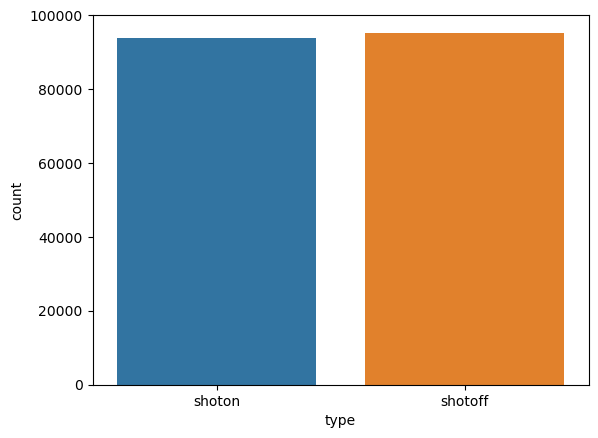

In [24]:
sns.countplot(x = df_match_ingame_shot_shot.type)

- The portion of the shot on target and the shot off target out of total shot are almost same.